In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from tdc.single_pred import Tox
data = Tox(name = 'AMES')
split = data.get_split()
df = pd.DataFrame(split['train'])
df

Found local copy...
Loading...
Done!


,Drug_ID,Drug,Y
0,Drug 1,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1
1,Drug 2,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0
2,Drug 3,[N-]=[N+]=CC(=O)NCC(=O)NN,1
3,Drug 4,[N-]=[N+]=C1C=NC(=O)NC1=O,1
4,Drug 6,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1
...,...,...,...
5089,Drug 7568,CCC(CCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C)C(C)C,0
5090,Drug 7587,CCCCCCCCCCCCOCCO,0
5091,Drug 7593,CCOP(=S)(CC)Sc1ccccc1,0
5092,Drug 7598,C=C(C)C1CC=C(C)C(OC(C)=O)C1,0


In [2]:
df.drop(['Drug_ID'], axis=1, inplace=True)
df = df.drop_duplicates()
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5084 entries, 0 to 5093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Drug    5084 non-null   object
 1   Y       5084 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.2+ KB


In [3]:
from rdkit import Chem 

#Method transforms smiles strings to mol rdkit object
df['molecula'] = df['Drug'].apply(lambda x: Chem.MolFromSmiles(x)) 

In [4]:
df.head()

,Drug,Y,molecula
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f720b65b620>
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f728e66b710>
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df30>
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df80>
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f71ff4c5e40>


In [5]:
df['num_of_atoms'] = df['molecula'].apply(lambda x: x.GetNumAtoms())
df['num_of_heavy_atoms'] = df['molecula'].apply(lambda x: x.GetNumHeavyAtoms())
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f720b65b620>,23,23
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f728e66b710>,50,50
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df30>,11,11
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df80>,10,10
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f71ff4c5e40>,19,19


In [6]:
def number_of_atoms(atom_list, df):
    for i in atom_list:
        df['num_of_{}_atoms'.format(i)] = df['molecula'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))

number_of_atoms(['C','O', 'N', 'Cl', 'Br', 'P'], df)

In [7]:
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f720b65b620>,23,23,20,2,1,0,0,0
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f728e66b710>,50,50,42,6,2,0,0,0
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df30>,11,11,4,2,5,0,0,0
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df80>,10,10,4,2,4,0,0,0
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f71ff4c5e40>,19,19,12,3,4,0,0,0


In [8]:
from rdkit.Chem import Descriptors
df['mol_weight'] = df['molecula'].apply(lambda x: Descriptors.MolWt(x))
df.head()

,Drug,Y,molecula,num_of_atoms,num_of_heavy_atoms,num_of_C_atoms,num_of_O_atoms,num_of_N_atoms,num_of_Cl_atoms,num_of_Br_atoms,num_of_P_atoms,mol_weight
0,O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f720b65b620>,23,23,20,2,1,0,0,0,301.345
1,O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...,0,<rdkit.Chem.rdchem.Mol object at 0x7f728e66b710>,50,50,42,6,2,0,0,0,646.614
2,[N-]=[N+]=CC(=O)NCC(=O)NN,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df30>,11,11,4,2,5,0,0,0,157.133
3,[N-]=[N+]=C1C=NC(=O)NC1=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f728e68df80>,10,10,4,2,4,0,0,0,138.086
4,CCCCN(CC(O)C1=CC(=[N+]=[N-])C(=O)C=C1)N=O,1,<rdkit.Chem.rdchem.Mol object at 0x7f71ff4c5e40>,19,19,12,3,4,0,0,0,264.285


<AxesSubplot:>

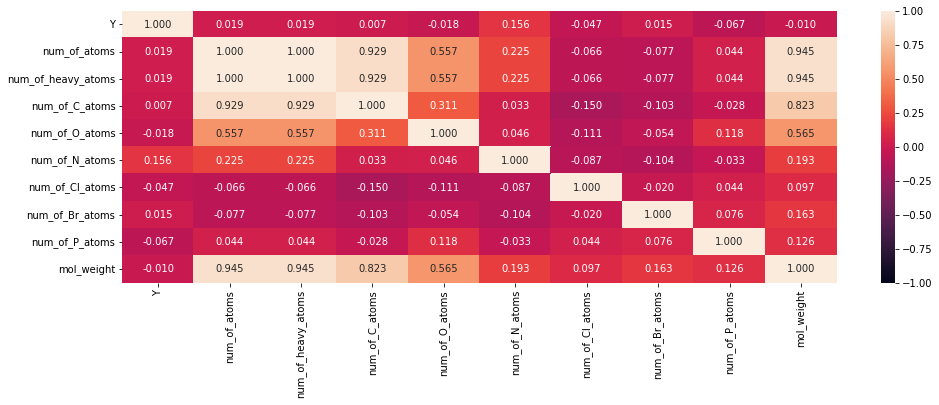

In [9]:
df = df.drop(['molecula'], axis=1)
corr = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, vmax=1, vmin=-1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt=".3f")